In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read the data

In [93]:
df=pd.read_csv("/content/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


understand the data

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [96]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [97]:
df.isna().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [98]:
df.isna().sum()/len(df)*100

,0
age,0.000000
job,0.138109
marital,0.000000
education,0.082865
default,0.000000
balance,0.055244
housing,0.000000
loan,0.027622
contact,0.101280
day,0.009207


In [99]:
df['y'].value_counts()

,count
y,
no,5572
yes,5289


In [100]:
df['contact'].value_counts()

,count
contact,
unknown,6091
cellular,4369
telephone,390


In [101]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8958
success,978
failure,618
other,307


In [102]:
df.duplicated().sum()

0

In [103]:
objective_df=df.select_dtypes(include="object").columns
objective_df

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [104]:
numeric_df=df.select_dtypes(include="number").columns
numeric_df

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

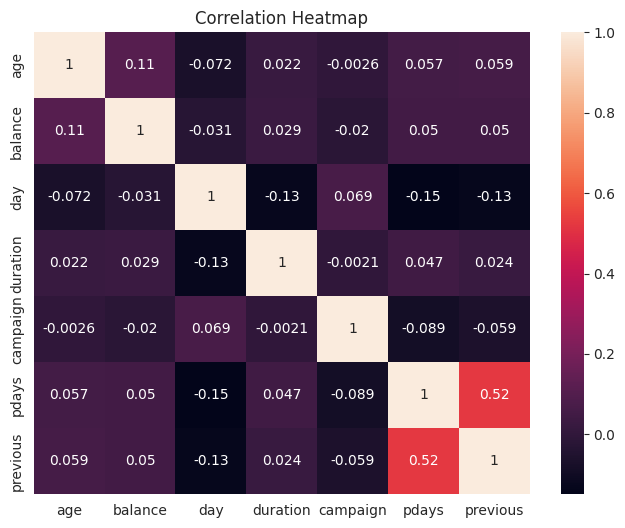

In [105]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [106]:
df.nunique()

,0
age,76
job,12
marital,3
education,4
default,2
balance,3876
housing,2
loan,2
contact,3
day,31


preprocessing

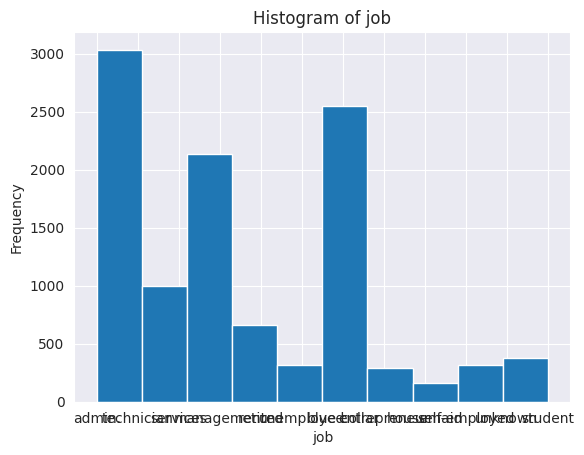

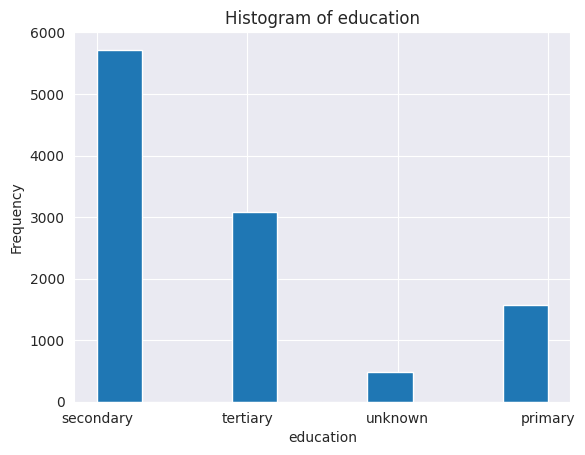

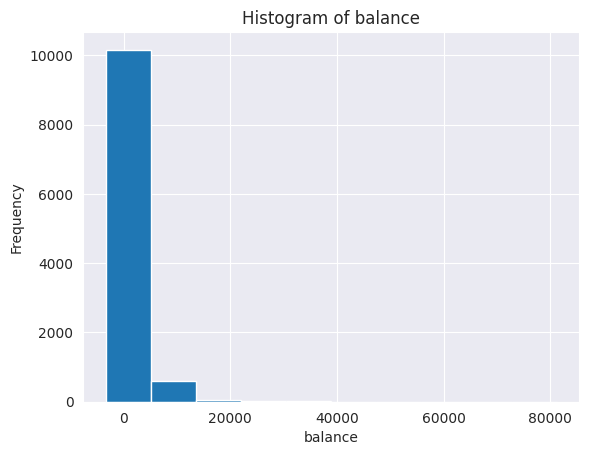

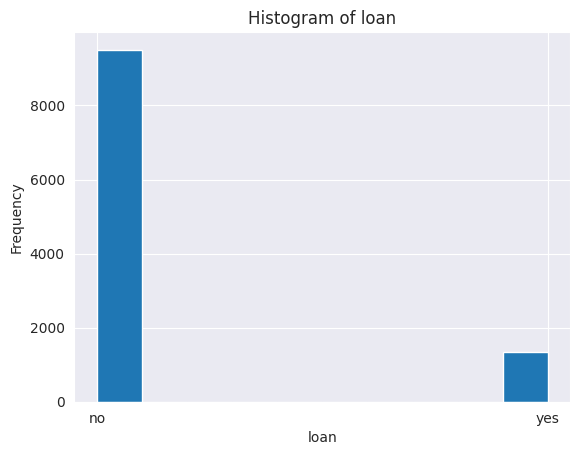

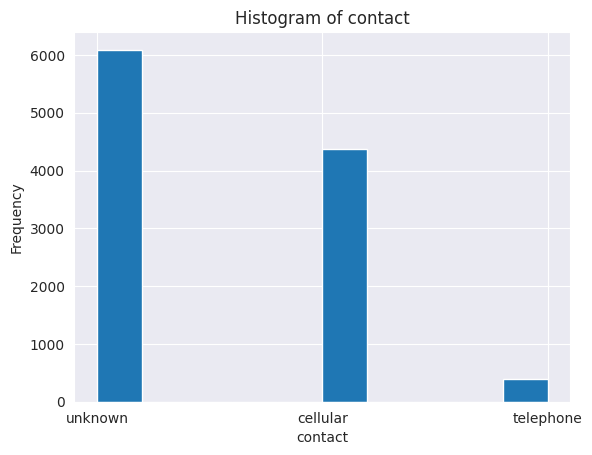

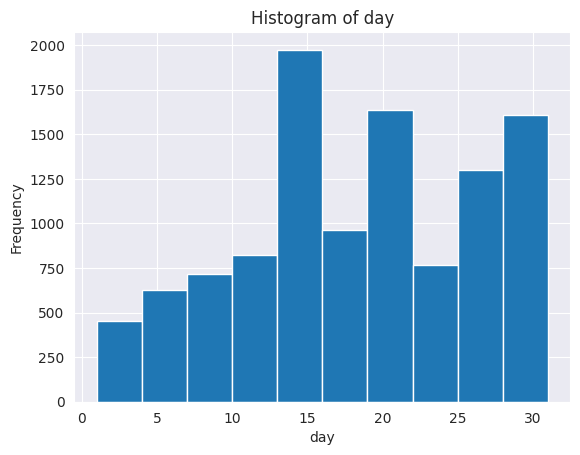

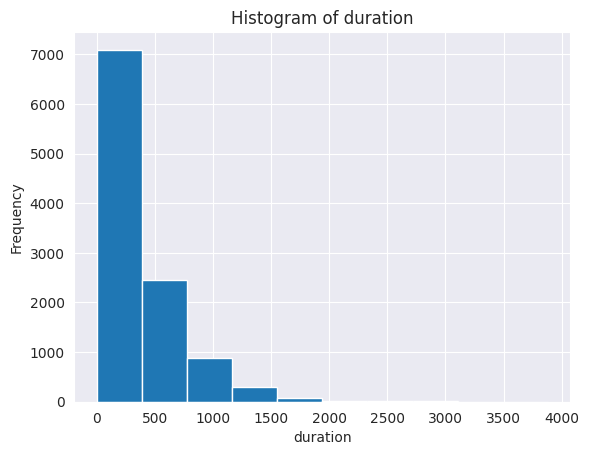

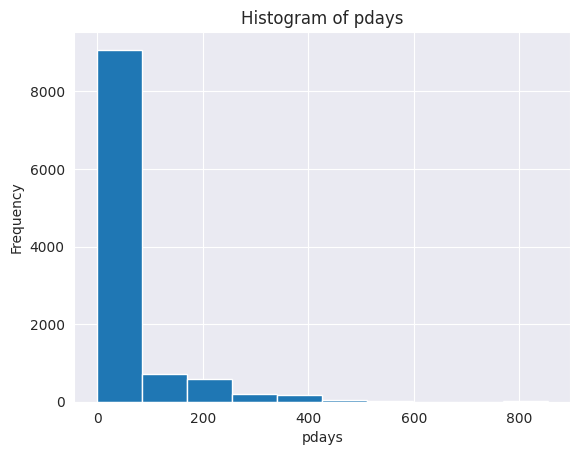

In [107]:
columns_with_missing = df.columns[df.isnull().any()]
for column in columns_with_missing:
    plt.hist(df[column].dropna())
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

When you observe that all null value distributions are skewed, it can indicate that the missing values might have a non-uniform distribution. In such cases, replacing missing values with the median is a good strategy because the median is less sensitive to skewed distributions compared to the mean. This approach helps in maintaining the central tendency of the data without being distorted by extreme values.

In [108]:
#handling the missing values
for i in df.columns:
    if df[i].dtype in ['float64', 'int64']:
        df[i].fillna(df[i].median(), inplace=True)

In [109]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)

In [110]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


outlier

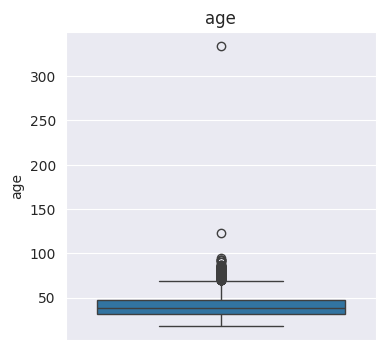

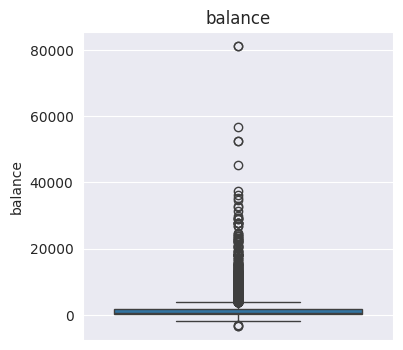

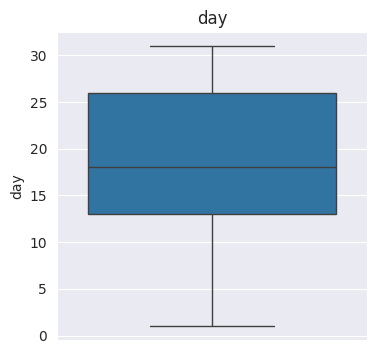

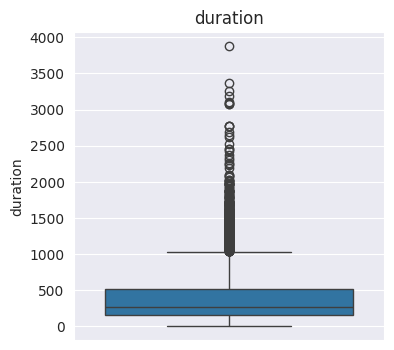

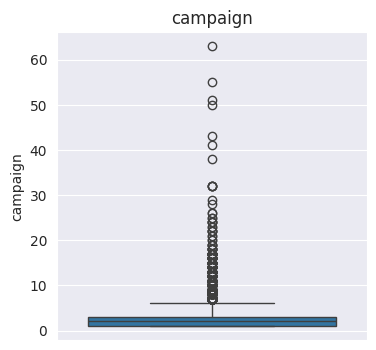

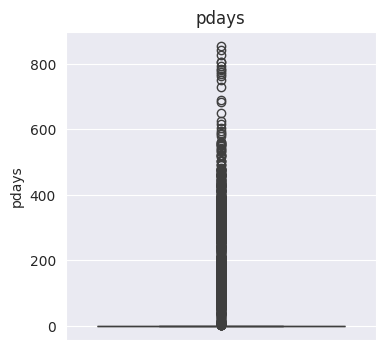

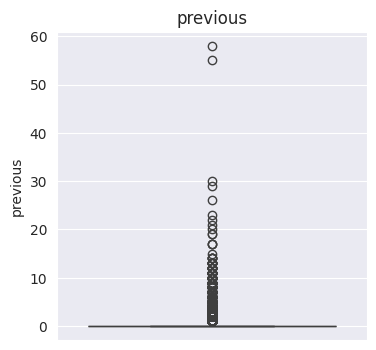

In [111]:
for i in df.columns:
  if((df[i].dtype == 'int64') | (df[i].dtype == 'float64')):
    plt.figure(figsize=(4,4))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

That makes sense if the outliers are significant to your analysis and could provide valuable insights. Sometimes outliers can reveal important patterns or anomalies that are relevant to understanding the underlying phenomena. Just make sure that your model can handle these outliers appropriately, as they might impact its performance.

EDA

<Figure size 600x400 with 0 Axes>

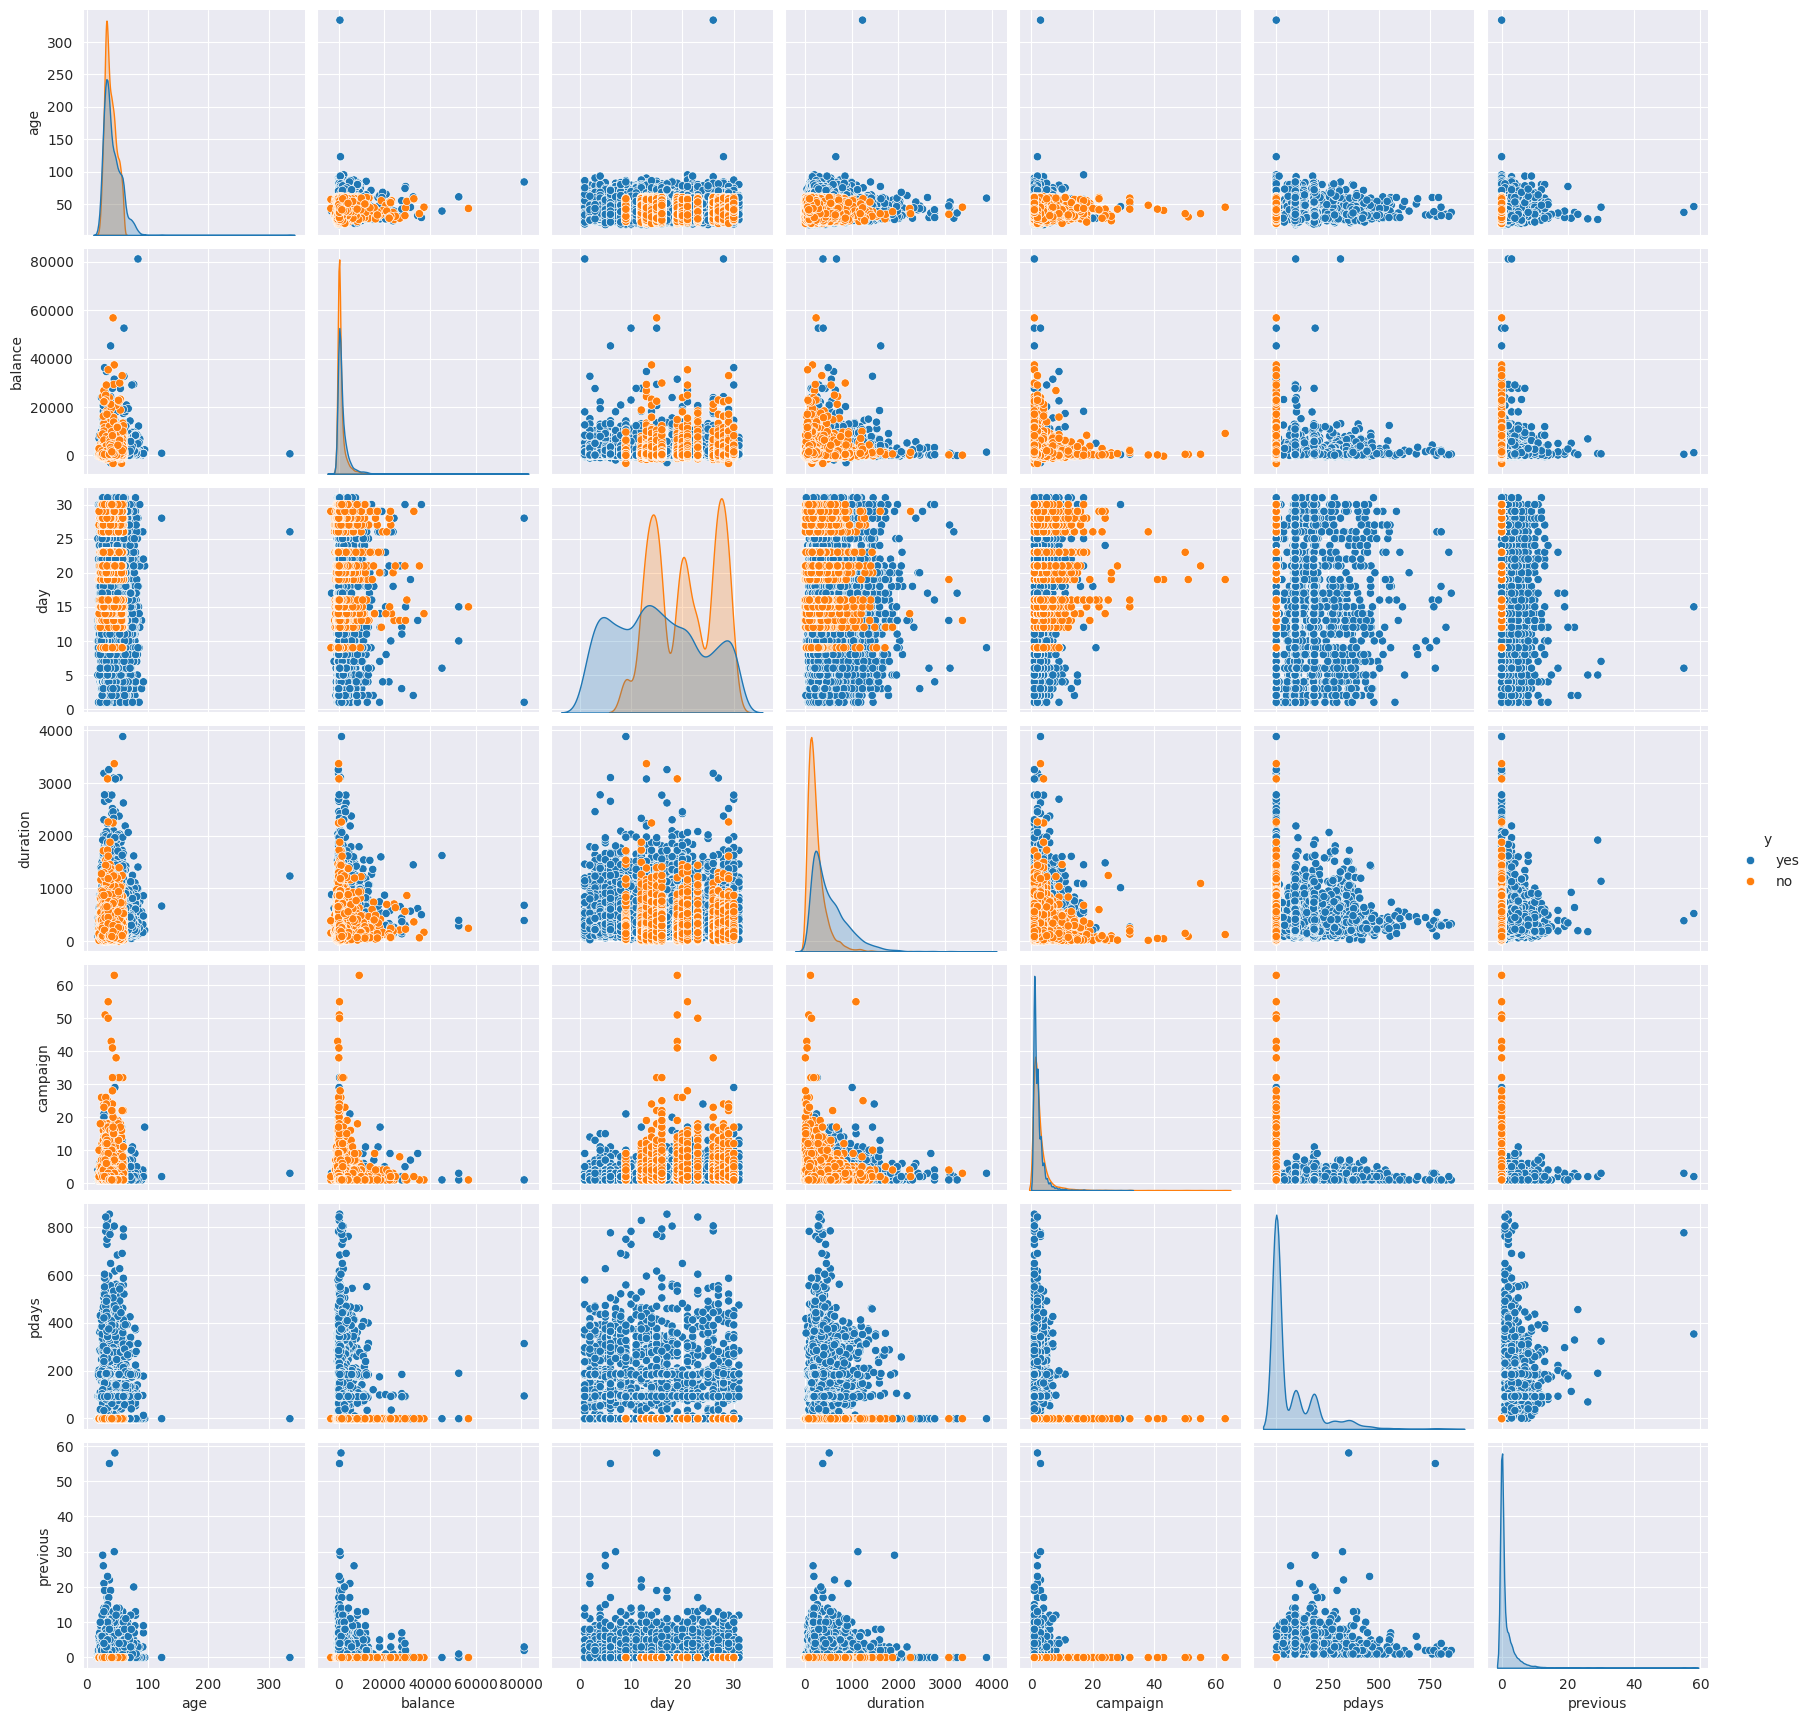

In [113]:
plt.figure(figsize=(6,4))
sns.pairplot(df, hue='y');

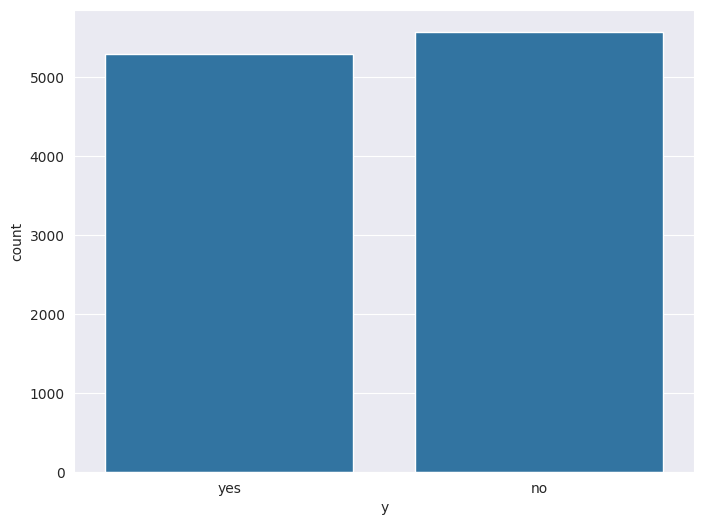

In [114]:
# y rate
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x='y', data=df);

The graph indicates that the values of y remain almost equal, suggesting little to no variation in the dependent variable across the data points, which may imply stability or a lack of influence from the independent variables in this range.

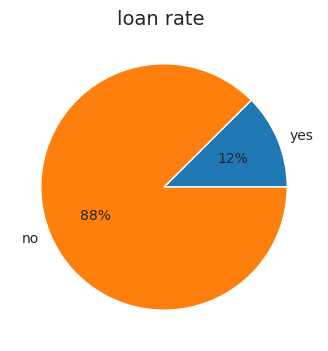

In [115]:
#loan rate
plt.pie(loan, labels= labels,autopct='%.0f%%')
plt.show()

The graph shows that 88% of individuals have not taken a loan, while only 12% have taken a loan. This indicates that the majority of the population in the dataset does not engage in borrowing, with a smaller proportion opting for loans.

<Figure size 1000x800 with 0 Axes>

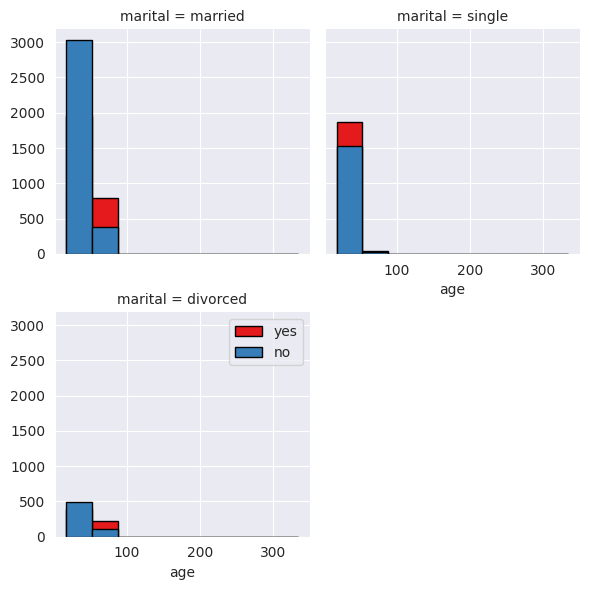

In [116]:
#marital status with y rate
plt.figure(figsize=(10,8))
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="marital", hue="y", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show();

The graph shows that married individuals take out more loans compared to single and divorced individuals, indicating a higher borrowing tendency among those who are married.

In [117]:
df['education'].value_counts()

,count
education,
secondary,5729
tertiary,3081
primary,1565
unknown,486


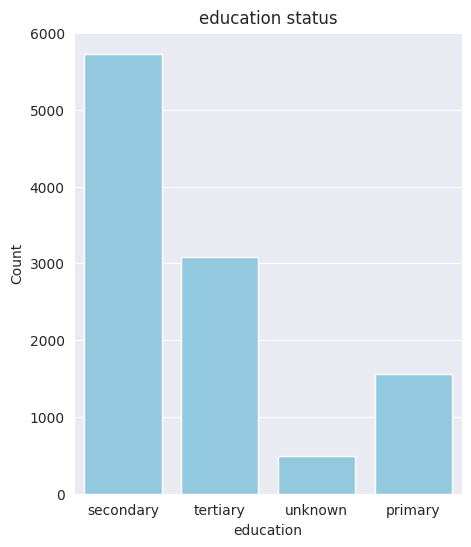

In [118]:
#education status
plt.figure(figsize=(5, 6))
sns.countplot(x='education', data=df, color='skyblue')
plt.title('education status')
title_font_size=30
plt.xlabel('education')
plt.ylabel('Count')
plt.show()

The graph shows that individuals with secondary education make up the largest proportion, indicating that people with this level of education are more prevalent in the dataset compared to other education levels

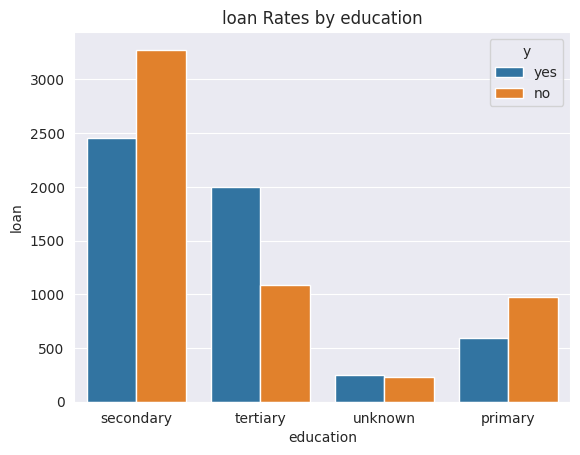

In [119]:
#loan rate by education
sns.countplot(x='education',hue='y',data=df)
plt.title("loan Rates by education")
title_font_size=30
plt.xlabel("education")
plt.ylabel("loan")
plt.show()

The graph shows that individuals with secondary education are less likely to take loans, as they make up a larger proportion of the group that has not taken loans compared to other education levels.

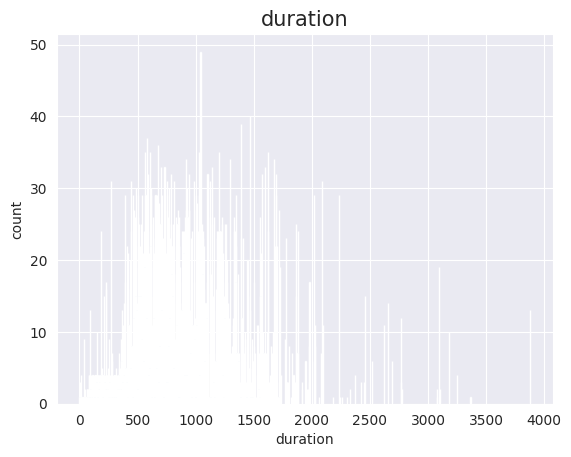

In [120]:
#duration of loan
plt.bar(df['duration'].unique(), df['duration'].value_counts())
plt.title("duration", fontsize=15)
plt.xlabel("duration")
plt.ylabel("count")
plt.show()


encording

In [ ]:
for i in df.columns:
  if(df[i].dtypes == 'object'):
    print(i)
    print(df[i].nunique())

In [ ]:
df_new = df.copy()

In [133]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df_new['job'] = le.fit_transform(df_new['job'])
df_new['marital'] = le.fit_transform(df_new['marital'])
df_new['education'] = le.fit_transform(df_new['education'])
df_new['default'] = le.fit_transform(df_new['default'])
df_new['housing'] = le.fit_transform(df_new['housing'])
df_new['loan'] = le.fit_transform(df_new['loan'])
df_new['contact'] = le.fit_transform(df_new['contact'])
df_new['month'] = le.fit_transform(df_new['month'])
df_new['poutcome'] = le.fit_transform(df_new['poutcome'])
df_new['y'] = le.fit_transform(df_new['y'])


In [134]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1
4,54,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3,1


Data Splitting

In [123]:
x = df.drop('y', axis=1)
y = df['y']

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 , random_state = 42)

In [136]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

modeling

Random Forest combines multiple decision trees to create a more accurate and robust model by aggregating their predictions. Testing the model helps evaluate its performance in predicting outcomes, which is especially important when dealing with large datasets containing numerous features. This approach ensures that the model can handle complex and varied data effectively, making the Random Forest classifier a strong choice for many classification tasks.









In [138]:
#Hyperparameter Tuning for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)

print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best accuracy: {grid_search_rf.best_score_}")

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)

print("Accuracy on test data: ", accuracy_score(y_test, y_pred_rf))
print("Classification report: \n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.6299635800546731
Accuracy on test data:  0.6293341515802393
Classification report: 
               precision    recall  f1-score   support

          no       0.61      0.74      0.67      1650
         yes       0.66      0.51      0.58      1609

    accuracy                           0.63      3259
   macro avg       0.64      0.63      0.62      3259
weighted avg       0.63      0.63      0.62      3259



In [140]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.61      0.74      0.67      1650
         yes       0.66      0.51      0.58      1609

    accuracy                           0.63      3259
   macro avg       0.64      0.63      0.62      3259
weighted avg       0.63      0.63      0.62      3259



The model achieves an accuracy of approximately 63%, which is consistent across both cross-validation and test data. However, the performance is slightly better at predicting 'no' cases compared to 'yes' cases.